# Poetry Generation Using Tensorflow, Keras, and LSTM
## Computer Liguistic Project, Submitted by : Aditya, Vidit, Shivani and Jitendra
### Indian Institute Of Information Technoloy (Lucknow)

In [2]:
!pip install wordcloud

## Import Necessary Libraries 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


# Merge poems' data collected from various sources into single file. (One time process)

In [ ]:
# import glob
# import os
# directory_path = r'C:\Users\vidit\Desktop\CLProject\topics'
# rel_paths = glob.glob(directory_path + '/**', recursive=True)
# for local_file in rel_paths:
#     if os.path.isfile(local_file):
#         with open(local_file, 'r', encoding = 'utf8') as file1:
#             data = file1.read() + '\n'
#             with open('master_new.txt', 'a+', encoding = 'utf8') as file2:
#                 file2.write(data)

## Import Text Data

In [3]:
master_data = open('master_new.txt', 'r', encoding = 'utf8').read()

## Verifying Zipf's Law on Raw Data

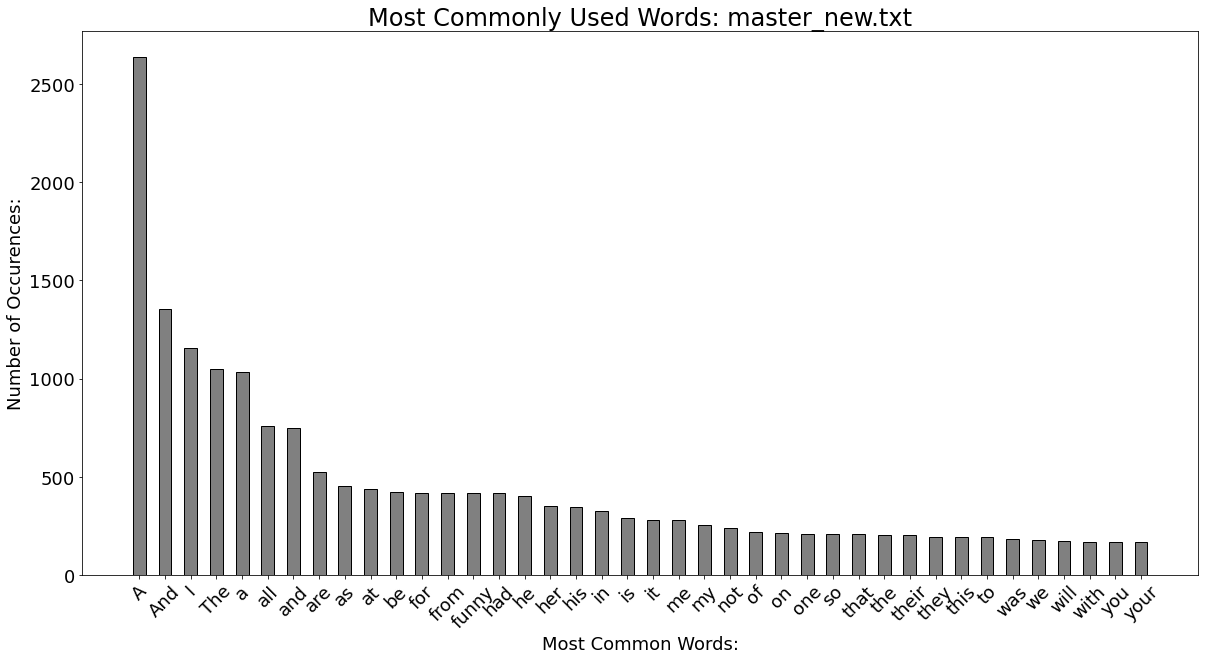

<Figure size 432x288 with 0 Axes>

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
def plotWordFrequency(data_file , figname):
    f = open(data_file,'r', encoding = 'utf8')
    words = [x for y in [l.split() for l in f.readlines()] for x in y]
    data = sorted([(w, words.count(w)) for w in set(words)], key = lambda x:x[1], reverse=True)[:40] 
    most_words = [x[0] for x in data]
    times_used = [int(x[1]) for x in data]
    plt.figure(figsize=(20,10))
    plt.bar(x=sorted(most_words), height=times_used, color = 'grey', edgecolor = 'black',  width=.5)
    plt.xticks(rotation=45, fontsize=18)
    plt.yticks(rotation=0, fontsize=18)
    plt.xlabel('Most Common Words:', fontsize=18)
    plt.ylabel('Number of Occurences:', fontsize=18)
    plt.title('Most Commonly Used Words: %s' % (data_file), fontsize=24)
    plt.show()
    plt.savefig(figname)
    

data_file ='master_new.txt'
figname = 'unclean.png'
plotWordFrequency(data_file, figname)

## Removing stopwords and verifying Zipf's Law on filtered data

In [18]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


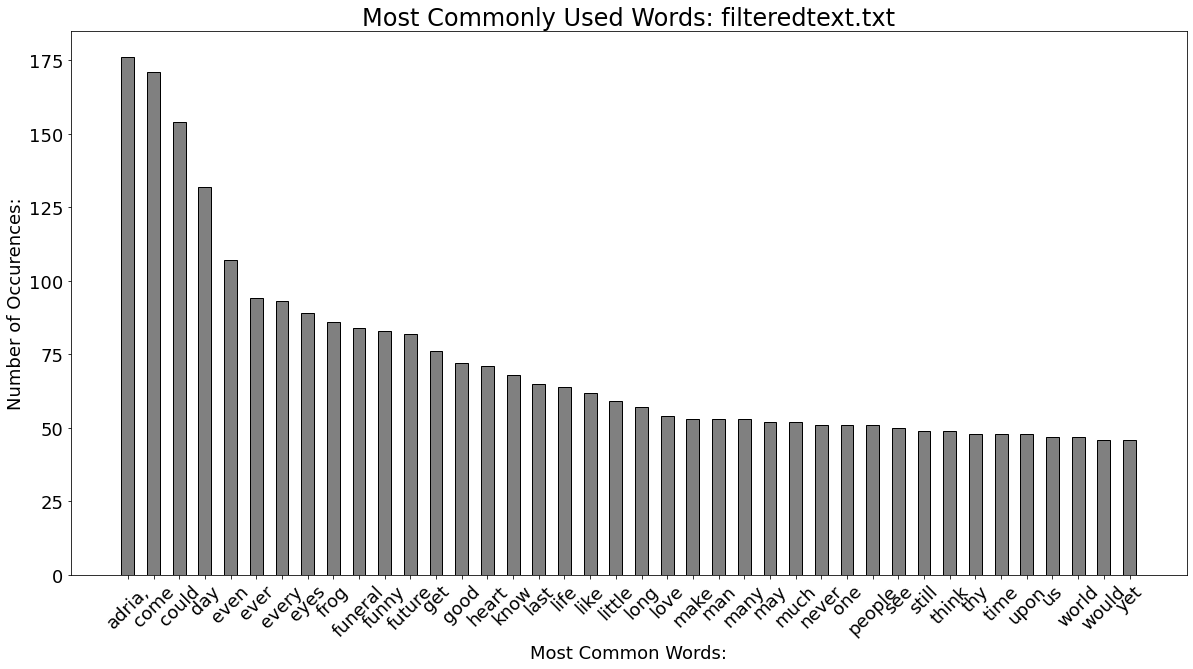

<Figure size 432x288 with 0 Axes>

In [17]:
import io 
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
 
stop_words = set(stopwords.words('english')) 
file1 = open(data_file, 'r', encoding= 'utf8') 
  

line = file1.read()
words = line.split() 
for r in words: 
    if not r.lower() in stop_words and r != '-':
        appendFile = open('filteredtext.txt','a+', encoding= 'utf8') 
        appendFile.write(" "+r) 
        appendFile.close() 
data_file = 'filteredtext.txt'
figname = 'clean.png'
plotWordFrequency(data_file, figname)

## Generating WordCloud to visualize the text for selecting seed text

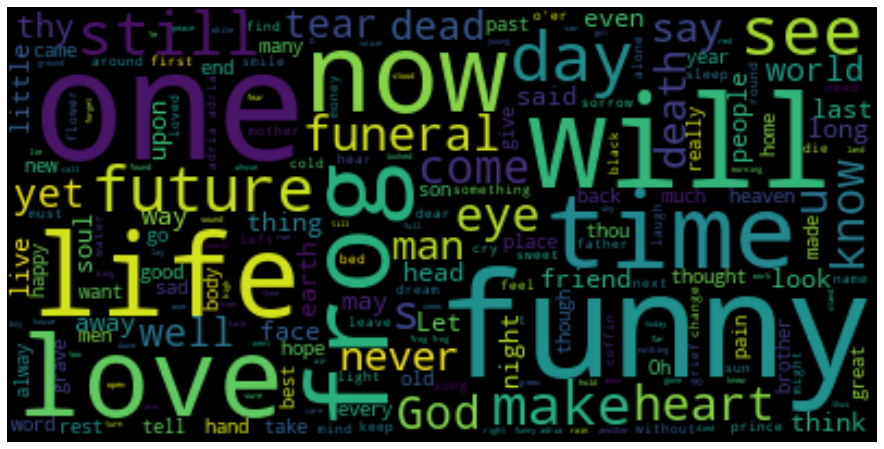

In [19]:
wordcloud = WordCloud(max_font_size=70,
					max_words=200,
					background_color="black").generate(master_data)

# Plotting the WordCloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("WordCloudBig.png")
plt.show()


## Generating the corpus by splitting the text into lines

In [20]:
data = master_data
corpus = data.lower().split("\n")
print(corpus[:10])

['look at the frog so small and cute', 'top to tail in his green suite', 'never dry not always wet', 'every child wants one for a pet', 'only the newt for a friend', 'swim in the pond from end to end', 'deep under water breath held tight', 'look at him swim such a delight', 'hear him call all through the night', 'a prince in waiting a king by right']


In [21]:
len(data)

314456

## Fitting the Tokenizer on the Corpus

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Vocabulary count of the corpus
total_words = len(tokenizer.word_index)

print("Total Words:", total_words)


Total Words: 9452


## Converting the text into embeddings

In [24]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]

	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
										maxlen=max_sequence_len,
										padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words+1)
predictors

array([[  0,   0,   0, ...,   0,   0, 140],
       [  0,   0,   0, ...,   0, 140,  37],
       [  0,   0,   0, ..., 140,  37,   1],
       ...,
       [  0,   0,   0, ...,  12,  44,  41],
       [  0,   0,   0, ...,  44,  41,  83],
       [  0,   0,   0, ...,  41,  83,  29]])

## Building a Bi-Directional LSTM Model

In [ ]:
model = Sequential()
model.add(Embedding(total_words+1, 100,
					input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words+1/2, activation='relu',
				kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
			optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 273, 100)          945300    
                                                                 
 bidirectional_1 (Bidirectio  (None, 273, 300)         301200    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 273, 300)          0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 9452)              954652    
                                                                 
 dense_3 (Dense)             (None, 9453)              89359209  
                                                      

## Training the Model

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('model{epoch:08d}.h5', save_freq=50)
history = model.fit(predictors, label, batch_size=64, epochs=250, verbose=1,callbacks=[checkpoint])

Epoch 1/250
779/779 [==============================] - 70s 86ms/step - loss: 7.3207 - accuracy: 0.0512
Epoch 2/250
779/779 [==============================] - 70s 89ms/step - loss: 6.9118 - accuracy: 0.0545
Epoch 3/250
779/779 [==============================] - 67s 86ms/step - loss: 6.7547 - accuracy: 0.0574
Epoch 4/250
779/779 [==============================] - 70s 90ms/step - loss: 6.6257 - accuracy: 0.0637
Epoch 5/250
779/779 [==============================] - 71s 91ms/step - loss: 6.5100 - accuracy: 0.0672
Epoch 6/250
779/779 [==============================] - 71s 91ms/step - loss: 6.3961 - accuracy: 0.0751
Epoch 7/250
779/779 [==============================] - 70s 90ms/step - loss: 6.2874 - accuracy: 0.0824
Epoch 8/250
779/779 [==============================] - 67s 86ms/step - loss: 6.1811 - accuracy: 0.0857
Epoch 9/250
779/779 [==============================] - 70s 90ms/step - loss: 6.0766 - accuracy: 0.0922
Epoch 10/250
779/779 [==============================] - 68s 87ms/step - l

In [ ]:
with open('history.txt', 'w', encoding='utf8') as f:
    f.write(history)

history


## Extracting accuracy and loss values for each epoch from history variable

In [ ]:
loss_dict = []
accuracy_dict = []
epoches = []
epoch = 1
with open('history.txt', 'r', encoding='utf8') as hist:
    lines = hist.readlines()
    for line in lines:
        if len(line) > 2:
            data = line.split(' ')
            loss = data[0].split(':')[1]
            loss = float(loss) * 10
            accuracy = data[1].replace('\n','').split(':')[1]
            accuracy = float(accuracy) * 100
            loss_dict.append(loss)
            accuracy_dict.append(accuracy)
            epoches.append(epoch)
            epoch +=1
print(accuracy_dict)

[5.12, 5.45, 5.74, 6.370000000000001, 6.72, 7.51, 8.24, 8.57, 9.22, 9.879999999999999, 10.4, 10.85, 11.4, 11.76, 12.1, 12.559999999999999, 13.07, 13.55, 14.16, 14.74, 15.290000000000001, 16.09, 16.650000000000002, 17.47, 18.0, 18.82, 19.6, 20.630000000000003, 21.42, 22.24, 23.25, 24.26, 25.53, 26.479999999999997, 27.57, 28.4, 29.39, 30.36, 31.6, 32.46, 33.1, 34.13, 34.949999999999996, 35.85, 36.77, 37.74, 38.54, 39.37, 39.73, 40.910000000000004, 41.839999999999996, 42.29, 43.08, 43.8, 44.519999999999996, 44.529999999999994, 45.37, 46.27, 46.72, 47.18, 48.25, 48.59, 49.220000000000006, 49.7, 50.349999999999994, 50.79, 51.55, 51.88, 52.18000000000001, 52.49, 53.37, 53.54, 54.459999999999994, 54.410000000000004, 55.02, 55.34, 55.92, 56.32, 56.39999999999999, 57.14, 57.199999999999996, 57.830000000000005, 58.36, 58.15, 58.98, 59.209999999999994, 59.650000000000006, 59.86, 60.08, 60.440000000000005, 60.81999999999999, 60.85, 61.38, 61.71, 61.809999999999995, 62.129999999999995, 62.31, 62.82

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])



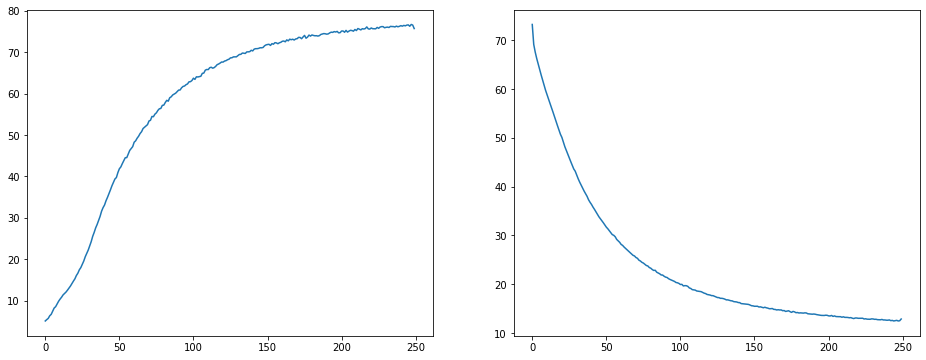

In [ ]:
import numpy as np
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(accuracy_dict)
#plt.yscale('symlog')

plt.subplot(1, 2, 2)
plt.plot(loss_dict)


## Testing of model based on seed text 

In [30]:
from keras.models import load_model
model = load_model('model00000250.h5')
seed_text = "Love"
next_words = 20
ouptut_text = ""

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences(
		[token_list], maxlen=max_sequence_len-1,
	padding='pre')
	predicted = np.argmax(model.predict(token_list,
										verbose=0), axis=-1)
	output_word = ""
	
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
			
	seed_text += " " + output_word
	
print(seed_text)


Love is a foundation for these films costly bỗng vultures wing for anguish for knowing i’m sent her yet south his
